In [1]:
# problem statement :how to analyze and predict, whether a person, who had boarded the RMS Titanic has a chance of survival or not, using Machine Learning’s Logistic Regression model.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
test_dataset = pd.read_csv('test.csv')
train_dataset =pd.read_csv('train.csv')
geneder_submission =pd.read_csv('gender_submission.csv')

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check the number of rows and columns in the dataset
train_dataset.shape


(891, 12)

In [5]:
#getting information about the dataset 
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check for missing values in the dataset
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#handling the missing value columns
#drop the cabin column
train_dataset=train_dataset.drop(columns='Cabin',axis=1)

In [8]:
#replacing the mean value of all the ages present in the age column to the mising value columns because we can not just drop the column
train_dataset['Age'].fillna(train_dataset['Age'].mean(),inplace=True)
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
#handling the dataset for mising value
#embark column
# embark column contains a categorical data for the person where he boarded the ship having three distinct values S Q C
# we will replace missing columns with modal value . 
print(train_dataset['Embarked'].mode())


0    S
Name: Embarked, dtype: object


In [10]:
train_dataset['Embarked'].fillna('S',inplace=True)

In [11]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [13]:
# analysing the dataset
train_dataset.describe()
# train_dataset.value_counts()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
#data visualization through count plot
sns.set()
#sns.countplot('survived')
#sns.countplot('Embarked')

<Axes: xlabel='Survived', ylabel='count'>

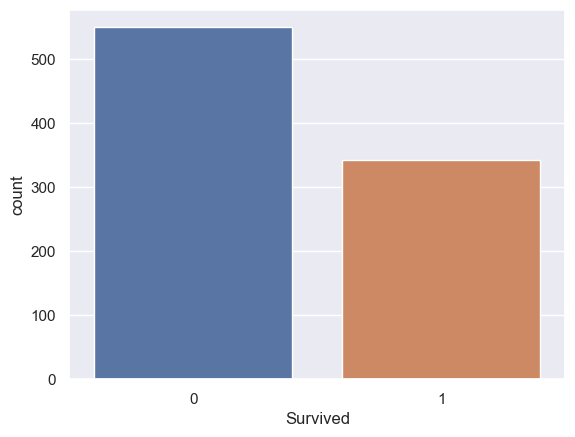

In [16]:
#older version of this function took direct column name but now an argukment is needed for plotting
# direct passing results in an error countplot() got multiple values for argument 'data'
sns.countplot(x=train_dataset['Survived'])

<Axes: xlabel='Embarked', ylabel='count'>

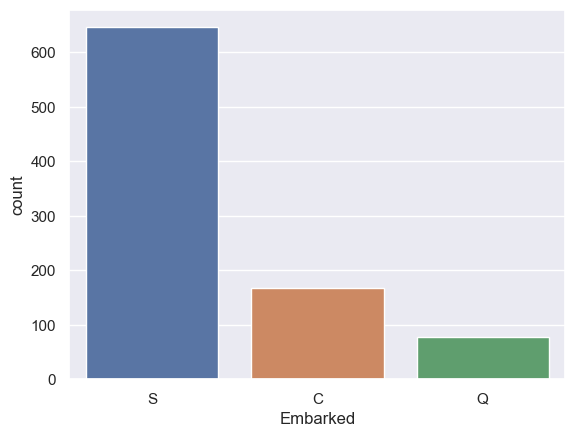

In [17]:
sns.countplot(x=train_dataset['Embarked'])

<Axes: xlabel='Sex', ylabel='count'>

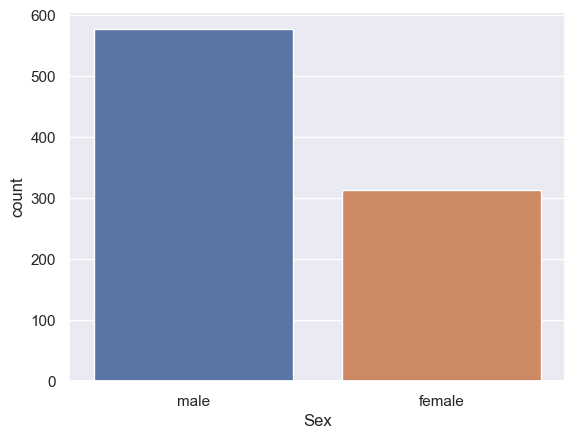

In [18]:
sns.countplot(x=train_dataset['Sex'])


<Axes: xlabel='Sex', ylabel='count'>

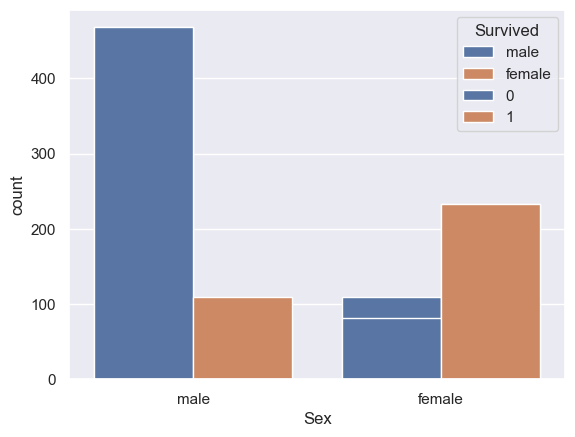

In [19]:
#no of survivors based on genders

sns.countplot(x=train_dataset['Survived'],hue=train_dataset['Sex'])

sns.countplot(x=train_dataset['Sex'],hue=train_dataset['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

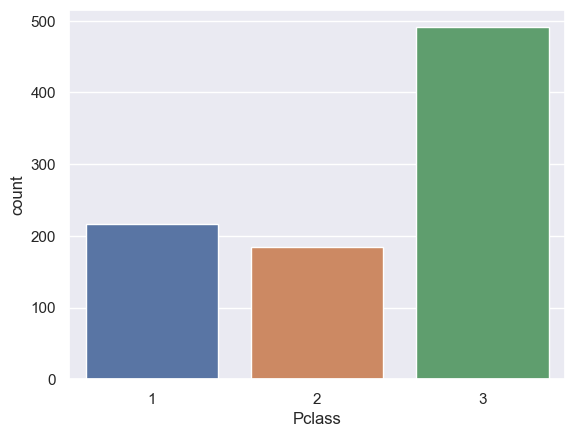

In [20]:
# making a count plot for "Pclass" column
sns.countplot(x=train_dataset['Pclass'])


In [21]:
train_dataset['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [22]:
train_dataset['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# converting categorical Columns

train_dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [24]:
#seprating the features and the target
X = train_dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = train_dataset['Survived']


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)


(891, 7) (712, 7) (179, 7)


In [27]:
model = LogisticRegression()


In [28]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# model evaluation :
# accuracy on training data
X_train_prediction = model.predict(X_train)


In [30]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.8075842696629213


In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)


In [32]:
print(X_test_prediction)


[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [33]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of test data :  0.7821229050279329
